In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from datetime import datetime

In [19]:
##1. data collection

In [15]:
now = datetime.now()
start=  datetime(now.year-10,now.month,now.day)
ticker = "NVDA"
df= yf.download(ticker, start, now)
df.tail(20)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2026-01-02,188.850006,192.929993,188.259995,189.839996,148240500
2026-01-05,188.119995,193.630005,186.149994,191.759995,183529700
2026-01-06,187.240005,192.169998,186.820007,190.520004,176862600
2026-01-07,189.110001,191.369995,186.559998,188.570007,153543200
2026-01-08,185.039993,189.550003,183.710007,189.110001,172457000
2026-01-09,184.860001,186.339996,183.669998,185.080002,131327500
2026-01-12,184.940002,187.119995,183.020004,183.220001,137968500
2026-01-13,185.809998,188.110001,183.399994,185.000000,160128900


In [16]:
df.reset_index()
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2016-02-02,0.684456,0.711044,0.679577,0.707385,341908000
2016-02-03,0.687871,0.693969,0.672016,0.689822,326772000
2016-02-04,0.688115,0.703726,0.681285,0.688846,348140000
2016-02-05,0.644696,0.691042,0.642744,0.683480,600428000
2016-02-08,0.615181,0.638110,0.606155,0.634939,608852000


Text(0, 0.5, 'Closing price')

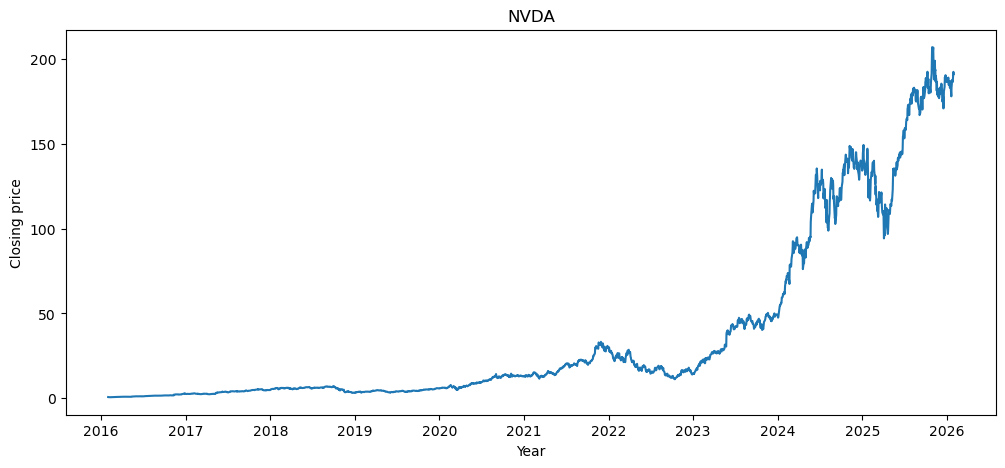

In [22]:
##2. data exploration and visualization
plt.figure(figsize=(12,5))
plt.title(ticker)
plt.plot(df.Close);
plt.xlabel("Year")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

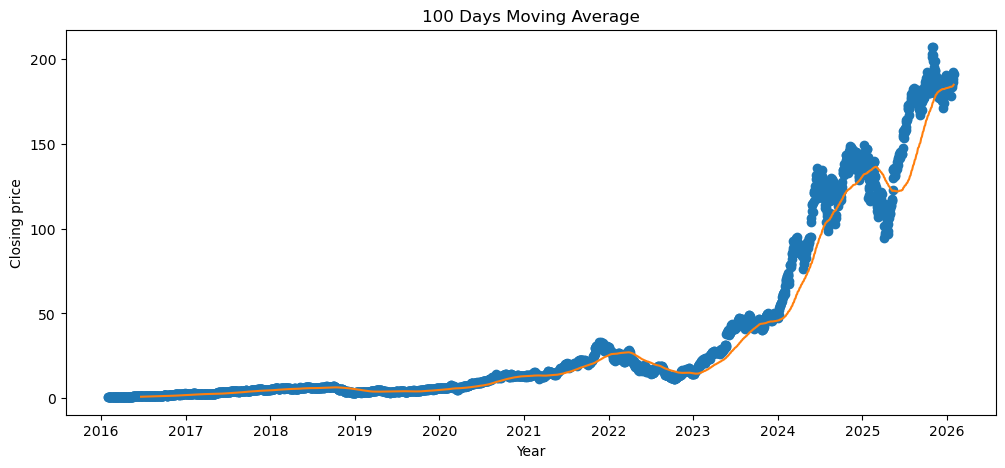

In [30]:
##3. feature eng
df['MA_100'] = df.Close.rolling(100).mean()
plt.figure(figsize=(12,5))
plt.plot(df.Close, 'o');
plt.plot(df['MA_100']);
plt.title("100 Days Moving Average")
plt.xlabel("Year")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

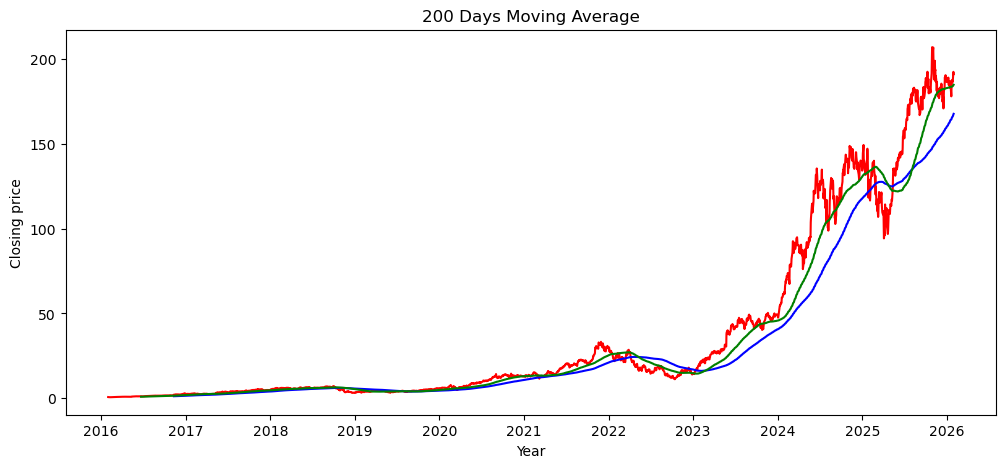

In [36]:
df['MA_200'] = df.Close.rolling(200).mean()
plt.figure(figsize=(12,5))
plt.plot(df.Close, 'r');
plt.plot(df['MA_200'],'b');
plt.plot(df['MA_100'],'g');
plt.title("200 Days Moving Average")
plt.xlabel("Year")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

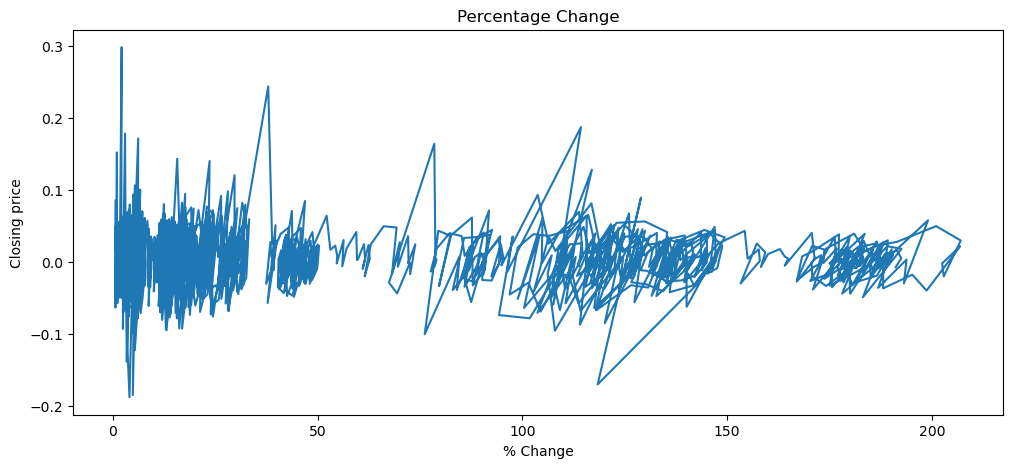

In [43]:
df['pct_change'] = df.Close.pct_change()

plt.figure(figsize=(12,5))
#plt.plot(df.Close, 'r');
plt.plot(df['Close'],df['pct_change']);
plt.title("Percentage Change")
plt.xlabel("% Change")
plt.ylabel("Closing price")


In [30]:
##4. data preprocessing
df.shape

(2515, 5)

In [17]:
# splitting data into training and testing data sets
training = pd.DataFrame(df.Close[0:int(len(df) * 0.7)])
testing = pd.DataFrame(df.Close[int(len(df) * 0.7): int(len(df))])
training

Ticker,NVDA
Date,
2016-02-02,0.684456
2016-02-03,0.687871
2016-02-04,0.688115
2016-02-05,0.644696
2016-02-08,0.615181
...,...
2023-01-20,17.821161
2023-01-23,19.173805
2023-01-24,19.245733


In [18]:
testing

Ticker,NVDA
Date,
2023-01-27,20.344635
2023-01-30,19.142836
2023-01-31,19.517466
2023-02-01,20.922054
2023-02-02,21.687288
...,...
2026-01-26,186.470001
2026-01-27,188.520004
2026-01-28,191.520004


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(training)
train_scaled

array([[0.00211901],
       [0.00222347],
       [0.00223093],
       ...,
       [0.5698774 ],
       [0.57164979],
       [0.58628696]], shape=(1759, 1))

In [19]:
##  5 Sequence creation

x_train = []
y_train = []


for i in range(100, training.shape[0]):
    x_train.append(training.iloc[i-100:i, 0].values)
    y_train.append(training.iloc[i, 0])


x_train, y_train = np.array(x_train),np.array(y_train)

x_train
x_train.ndim

2

In [20]:
import tensorflow as tf
print(tf.__version__);

2.20.0


In [15]:
##  6 Create Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
model = Sequential()
model.add(LSTM(
    units=128,
    activation='tanh',
    input_shape=(100, 1),
    return_sequences=True
))
model.add(LSTM(64))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
##  7 Train Model

model.compile(optimizer='adam')
model.fit(x_train, y_train, epochs=50)

NameError: name 'x_train' is not defined